<a href="https://colab.research.google.com/github/SoleromYess/Simulaci-n-II/blob/main/Extra/Simulaci%C3%B3n_Monte_Carlo_de_precios.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**a) Descargue los datos históricos de Facebook (del 1 de julio de 2022 al 31 de abril de 2023) de Yahoo Finanzas, guardelos en un DataFrame de Pandas e imprima el encabezado, grafique los rendimientos y determine el rendimiento promedio**


In [101]:
import yfinance as yf #Libreria de Yahoo finance
import pandas as pd #Libreria para manipulacion de datos y data frames
import matplotlib.pyplot as plt #Libreria para gráficos
from statistics import mean,stdev,pstdev
from math import log
import pandas_datareader as pdr
import datetime

# Descargar los datos históricos de Facebook desde Yahoo Finance
facebook = yf.download('META', start='2022-07-01', end='2023-04-30')

# Crear un DataFrame de Pandas
df = pd.DataFrame(facebook)

# Imprimir el encabezado del DataFrame
print(df.head())

[*********************100%***********************]  1 of 1 completed
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2022-07-01  160.309998  160.619995  155.000000  160.029999  160.029999   
2022-07-05  158.139999  168.250000  157.020004  168.190002  168.190002   
2022-07-06  168.199997  171.589996  165.460007  169.770004  169.770004   
2022-07-07  169.449997  172.720001  167.779999  172.190002  172.190002   
2022-07-08  169.979996  172.399994  168.149994  170.880005  170.880005   

              Volume  
Date                  
2022-07-01  31423900  
2022-07-05  28618600  
2022-07-06  23085900  
2022-07-07  24083400  
2022-07-08  19249200  


In [102]:
ts=df["Close"]

lp=[] #creamos una lista vacia para los precios

for i in range(len(ts)):
     lp.append(ts.iloc[i])

lr=[] #lista de rendimientos
for i in range(0,len(lp)):
    #print(ts[i])
    lr.append((lp[i-1]/lp[i])-1) #para lso rendimientos usamos la formula de el precio de cierre anterior entre el precio de cierre actual menos 1

#print(f"\n El rendimiento medio es: ", mean(lr))

Grafica de precios y rendimientos

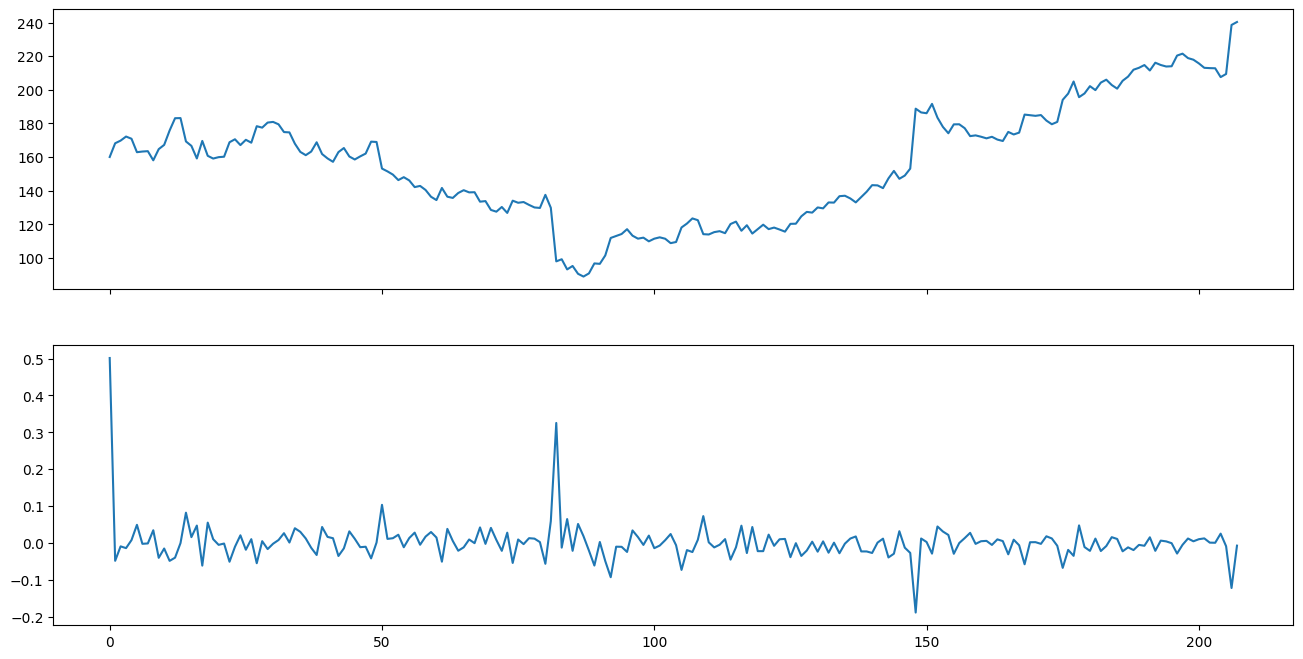

In [103]:
fig, ax=plt.subplots(2,1,figsize=(16,8), sharex=True)
ax[0].plot(lp)
ax[1].plot(lr)

##**b) Realice las pruebas para determinar si los rendimientos siguen un movimiento browniano: histograma, gráfica cuantil-cuantil, test de Kolmogorov.**


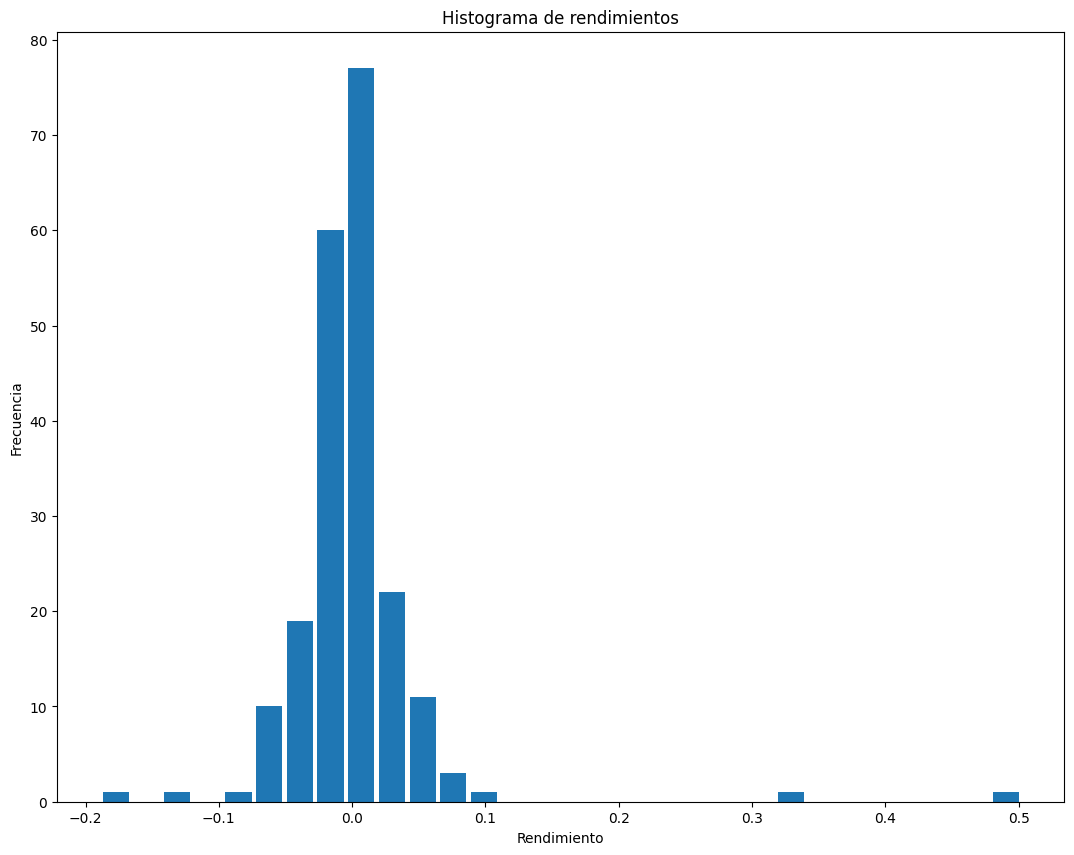

In [113]:
import numpy as np
import scipy.stats as stats

# Histograma de los rendimientos
plt.figure(figsize=(13, 10))
plt.hist(lr, rwidth=0.85, bins=30)
plt.xlabel('Rendimiento')
plt.ylabel('Frecuencia')
plt.title('Histograma de rendimientos')
plt.show()

Los datos siguen una distribución normal.

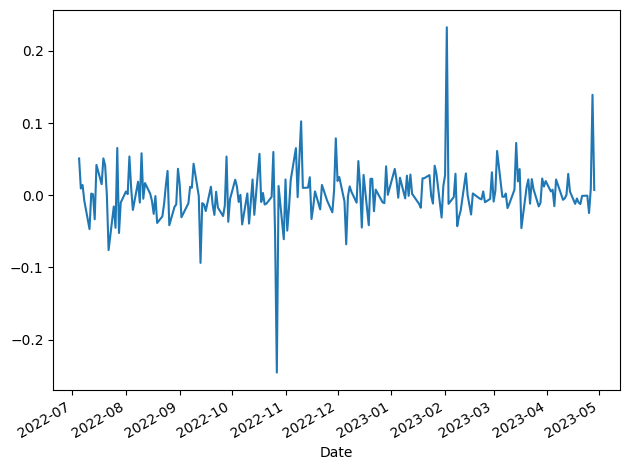

<Figure size 1300x1000 with 0 Axes>

Rendimiento promedio: 0.27%


In [115]:
adj_close = df['Adj Close']
returns = adj_close.pct_change().dropna()

ax = returns.plot()
# Graficar los rendimientos
#plt.figure(figsize=(13, 10))
plt.tight_layout()
plt.figure(figsize=(13, 10))# Ajustar el tamaño de la gráfica
#plt.plot(lr) #grafica de los rendimientos

plt.show()

print(f'Rendimiento promedio: {100 * returns.mean():.2f}%')

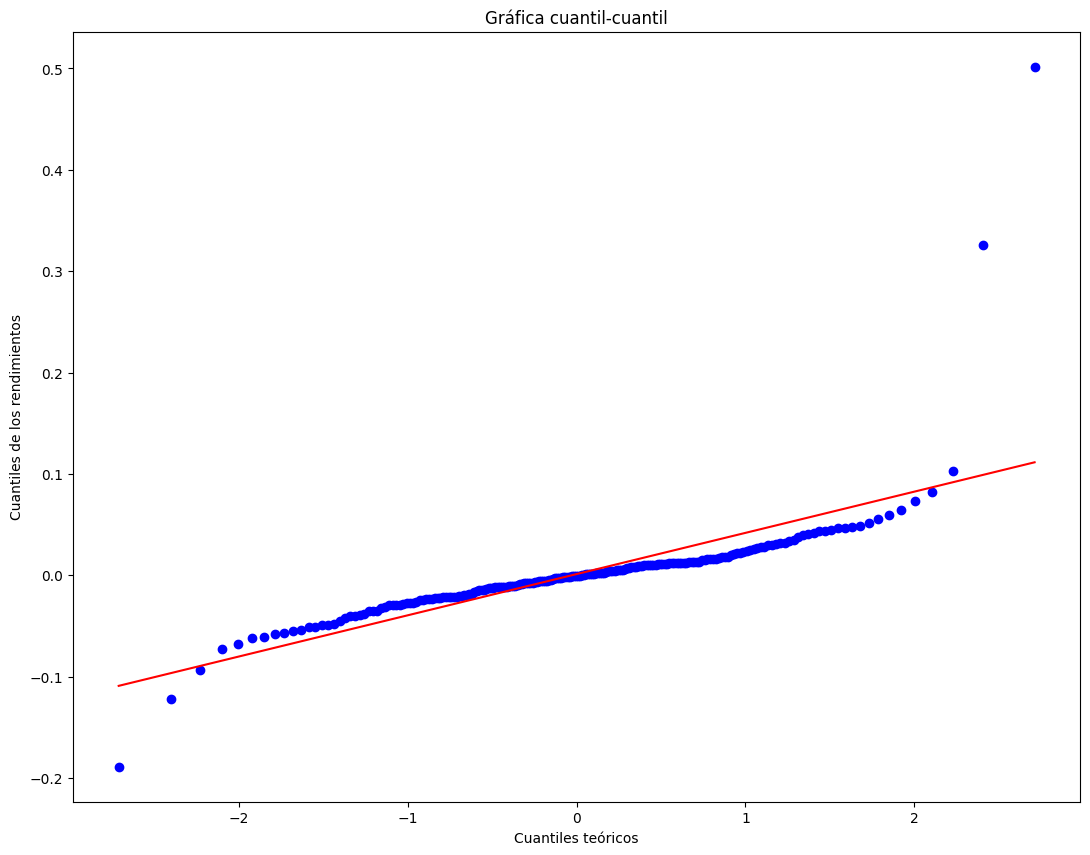

In [116]:
# Gráfica cuantil-cuantil
plt.figure(figsize=(13, 10))
stats.probplot(lr, dist='norm', plot=plt)
plt.xlabel('Cuantiles teóricos')
plt.ylabel('Cuantiles de los rendimientos')
plt.title('Gráfica cuantil-cuantil')
plt.show()

In [107]:
from scipy.stats import kstest
kstest(returns, 'norm', args=(mu, sigma))

KstestResult(statistic=0.17703098680142662, pvalue=3.8078471431971747e-06, statistic_location=-0.018003062038167372, statistic_sign=-1)

In [108]:
from random import gauss
mu=0.001
sigma=0.04  #sigma
p0=10
t=30

# Test de Kolmogorov-Smirnov
ks_stat, p_value = stats.kstest(lr, 'norm')
print("Estadístico de Kolmogorov-Smirnov:", ks_stat)
print("Valor p:", p_value)

Estadístico de Kolmogorov-Smirnov: 0.45641698329039543
Valor p: 3.9831633110165476e-40


##**c) Divida el conjunto de datos en un 70% para entrenamiento y 30% de prueba. Del conjunto de entrenamiento determine mu y sigma, y úselos para predecir el precio en el conjunto de prueb Grafique el resultado.**


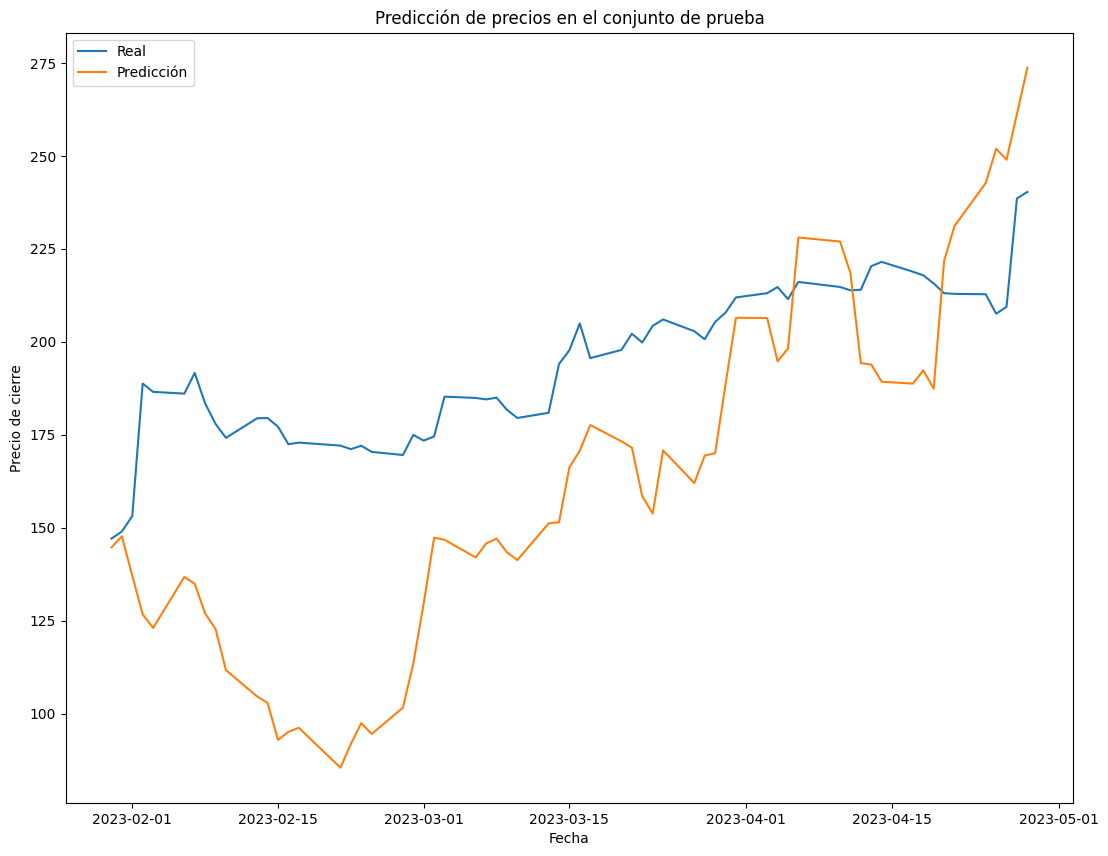

In [109]:
import numpy as np
import matplotlib.pyplot as plt

# Dividir en conjunto de entrenamiento y prueba
train_size = int(len(lr) * 0.7)
train_rendimientos = lr[:train_size]
test_rendimientos = lr[train_size:]

# Calcular mu y sigma en el conjunto de entrenamiento
mu = np.mean(train_rendimientos)
sigma = np.std(train_rendimientos)

# Generar precios en el conjunto de prueba
n_test = len(test_rendimientos)
predicted_prices = [df['Close'].iloc[train_size]] * (n_test + 1)
for i in range(n_test):
    predicted_prices[i+1] = predicted_prices[i] * np.exp(mu + sigma * np.random.randn())

# Graficar resultados
plt.figure(figsize=(13, 10))
plt.plot(df.index[train_size:train_size+n_test], df['Close'].iloc[train_size:train_size+n_test], label='Real')
plt.plot(df.index[train_size:train_size+n_test], predicted_prices[1:], label='Predicción')
plt.xlabel('Fecha')
plt.ylabel('Precio de cierre')
plt.title('Predicción de precios en el conjunto de prueba')
plt.legend()
plt.show()


##**d) Repita el procedimiento para una partición entrenamiento-prueba del 80-20%**


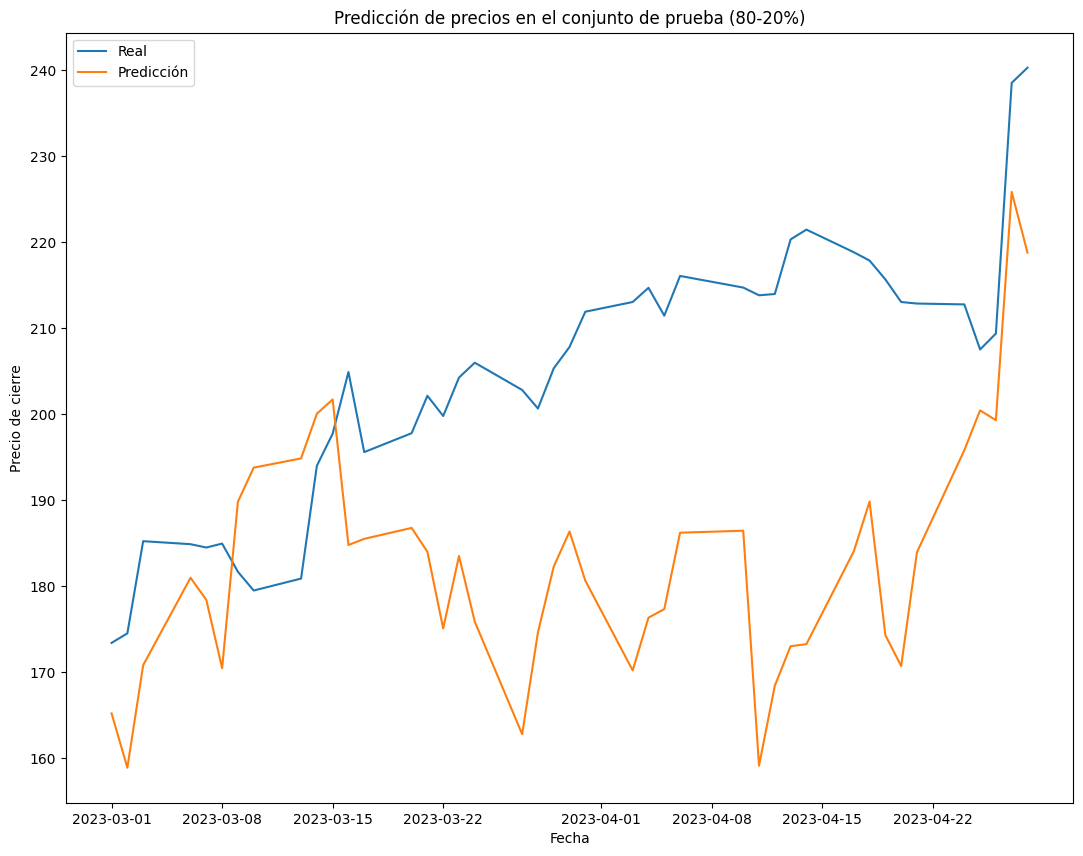

In [110]:
# Dividir en conjunto de entrenamiento y prueba (80-20%)
train_size = int(len(lr) * 0.8)
train_rendimientos = lr[:train_size]
test_rendimientos = lr[train_size:]

# Calcular mu y sigma en el conjunto de entrenamiento
mu = np.mean(train_rendimientos)
sigma = np.std(train_rendimientos)

# Generar precios en el conjunto de prueba
n_test = len(test_rendimientos)
predicted_prices = [df['Close'].iloc[train_size]] * (n_test + 1)
for i in range(n_test):
    predicted_prices[i+1] = predicted_prices[i] * np.exp(mu + sigma * np.random.randn())

# Graficar resultados
plt.figure(figsize=(13, 10))
plt.plot(df.index[train_size:train_size+n_test], df['Close'].iloc[train_size:train_size+n_test], label='Real')
plt.plot(df.index[train_size:train_size+n_test], predicted_prices[1:], label='Predicción')
plt.xlabel('Fecha')
plt.ylabel('Precio de cierre')
plt.title('Predicción de precios en el conjunto de prueba (80-20%)')
plt.legend()
plt.show()

##**e) Repita para una partición 90-10% y elabore algunas conclusiones a partir de las gráficas**

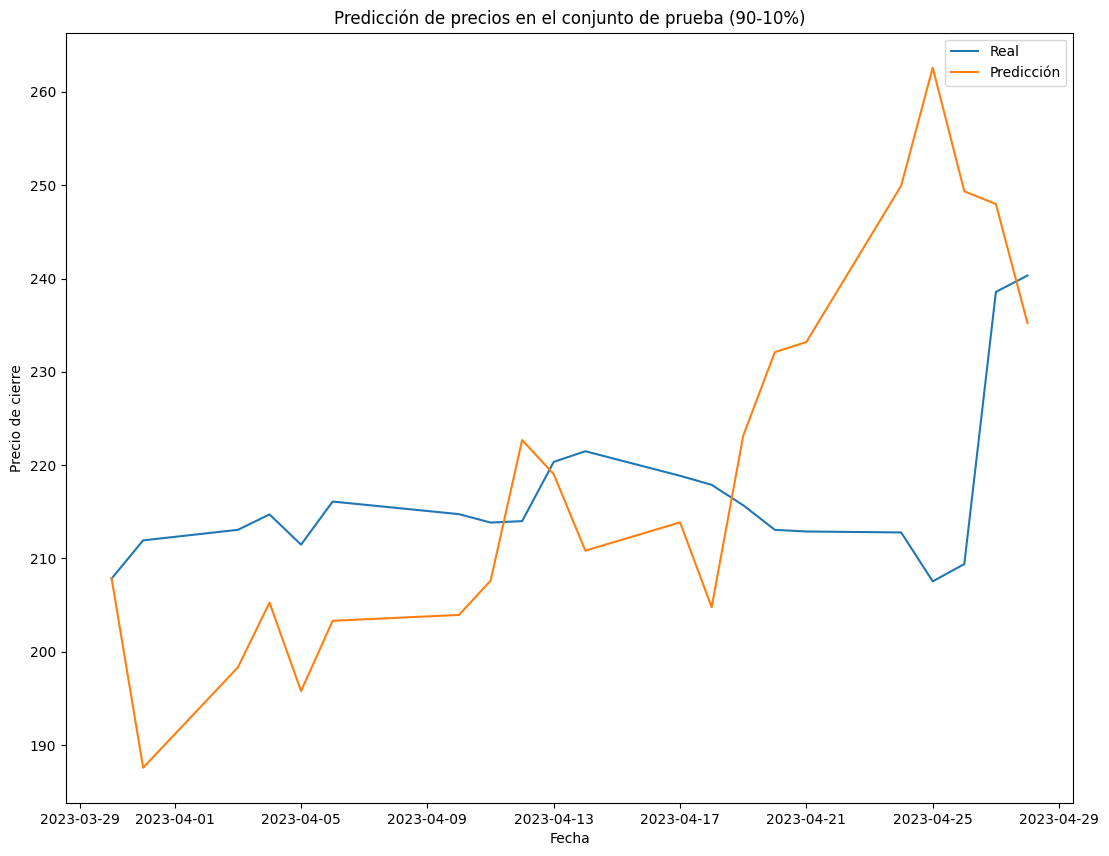

In [111]:
# Dividir en conjunto de entrenamiento y prueba (90-10%)
train_size = int(len(lr) * 0.9)
train_rendimientos = lr[:train_size]
test_rendimientos = lr[train_size:]

# Calcular mu y sigma en el conjunto de entrenamiento
mu = np.mean(train_rendimientos)
sigma = np.std(train_rendimientos)

# Generar precios predichos en el conjunto de prueba
n_test = len(test_rendimientos)
predicted_prices = [df['Close'].iloc[train_size]] * (n_test + 1)
for i in range(n_test):
    predicted_prices[i+1] = predicted_prices[i] * np.exp(mu + sigma * np.random.randn())

# Graficar resultados
plt.figure(figsize=(13, 10))
plt.plot(df.index[train_size:train_size+n_test], df['Close'].iloc[train_size:train_size+n_test], label='Real')
plt.plot(df.index[train_size:train_size+n_test], predicted_prices[1:], label='Predicción')
plt.xlabel('Fecha')
plt.ylabel('Precio de cierre')
plt.title('Predicción de precios en el conjunto de prueba (90-10%)')
plt.legend()
plt.show()

En base a las gráficas se observa que
Si los precios predecidos siguen una tendencia similar a los precios reales entre más grande sea la partición de 'entrenamiento',esto  indica que el modelo de predicción está capturando ciertos patrones o comportamientos en los datos.

 Sin embargo, si hay una diferencia significativa entre los precios reales y los precios pronosticados, es posible que el modelo no esté tomando adecuadamente la variabilidad y el movimiento del precio.
